In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

## Part 1: Exploratory Data Analysis (EDA) ##
This section provides a thorough exploratory data analysis (EDA) of the Mushroom dataset. The analysis includes visualizations and discussions to understand the data better and draw meaningful insights.

### Data Description ###
The Mushroom dataset, donated on April 26, 1987, by the Audubon Society Field Guide, includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility. This dataset, which is publicly available on the UCI Machine Learning Repository, is used for classification tasks.

The dataset consists of 8124 instances and 22 categorical features. The features include characteristics such as cap shape, cap surface, cap color, bruises, odor, gill attachment, gill spacing, gill size, gill color, stalk shape, stalk root, stalk surface above ring, stalk surface below ring, stalk color above ring, stalk color below ring, veil type, veil color, ring number, ring type, spore print color, population, and habitat.

### Data Loading and  Preprocessing (Cleaning) ###
The dataset does not contain any missing values, except for the "stalk-root" feature, which has missing values denoted by '?'. These missing values were replaced with the mode of the column.

For each categorical feature, label encoding was performed to convert the categories to numerical values. This preprocessing step is essential for machine learning models to process the data effectively.

In [30]:
# Load dataset
data_path = 'data/agaricus-lepiota.data'

column_names = [
    'class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
    'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
    'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
    'stalk-surface-below-ring', 'stalk-color-above-ring', 
    'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 
    'ring-type', 'spore-print-color', 'population', 'habitat'
]

# Read dataset
data = pd.read_csv(data_path, header=None, names=column_names)

# Display dataset info
print(data.info())

# Display first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [31]:
# Replace '?' with NaN and then fill with mode
data['stalk-root'] = data['stalk-root'].replace('?', np.nan)
data['stalk-root'] = data['stalk-root'].fillna(data['stalk-root'].mode()[0])

# Verify missing values are handled
print(data.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [33]:
# Label Encoding
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Display the first few rows of the dataframe
print(data.head())

   class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0      1          5            2          4        1     6                1   
1      0          5            2          9        1     0                1   
2      0          0            2          8        1     3                1   
3      1          5            3          8        1     6                1   
4      0          5            2          3        0     5                1   

   gill-spacing  gill-size  gill-color  ...  stalk-surface-below-ring  \
0             0          1           4  ...                         2   
1             0          0           4  ...                         2   
2             0          0           5  ...                         2   
3             0          1           5  ...                         2   
4             1          0           4  ...                         2   

   stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  \
0         

In [35]:
# Helper function to create a table for missing values
def missing_values_table(data):
    mis_val = data.isnull().sum()
    mis_val_percent = 100 * data.isnull().sum() / len(data)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})
    return mis_val_table_ren_columns

# Display missing values in a table format
missing_values_table(data)

,Missing Values,% of Total Values
class,0,0.0
cap-shape,0,0.0
cap-surface,0,0.0
cap-color,0,0.0
bruises,0,0.0
odor,0,0.0
gill-attachment,0,0.0
gill-spacing,0,0.0
gill-size,0,0.0
gill-color,0,0.0


### Visualizations and Analysis ###
Class Distribution:This plot shows the distribution of edible and poisonous mushrooms in the dataset.

Feature Distribution by Class: This plot visualizes the distribution of different cap shapes, separated by class (edible or poisonous).

Correlation Heatmap: This heatmap displays the correlations between different features in the dataset.

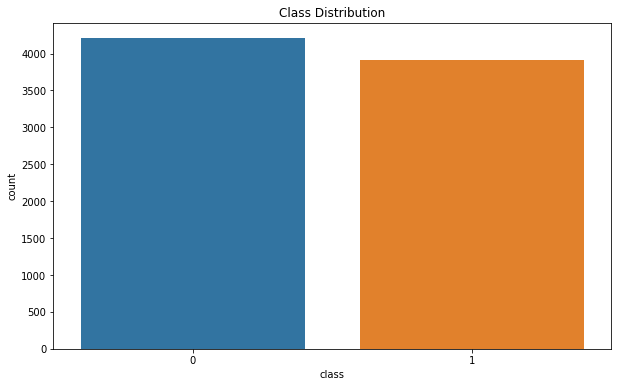

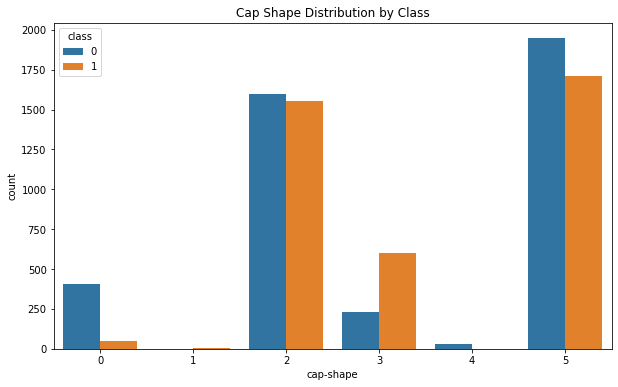

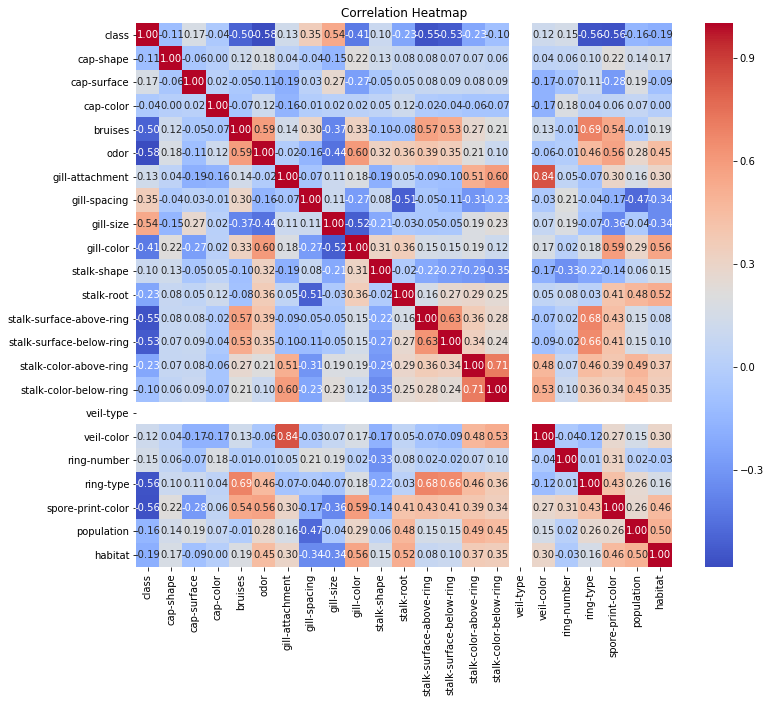

In [42]:
# Visualize the class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='class')
plt.title('Class Distribution')
plt.show()

# Visualize feature distribution by class
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='cap-shape', hue='class')
plt.title('Cap Shape Distribution by Class')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = data.apply(lambda x: x.factorize()[0]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.gca().set_ylim(len(corr), 0)
plt.show()

### Conclusions and Discussions ###
The EDA reveals that the dataset is well-balanced in terms of class distribution, with approximately equal numbers of edible and poisonous mushrooms. The correlation heatmap indicates relationships between features, which can be useful for feature selection and understanding the data structure. The handling of missing values ensures that the dataset is clean and ready for modeling. The visualizations provide a comprehensive understanding of the data, aiding in identifying patterns and potential issues.

## Part 2: Model ##

The dataset is divided into training and testing sets to train and evaluate the models effectively. Multiple machine learning models are compared using various performance metrics. Feature importance and hyperparameter tuning are also explored to optimize model performance.

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import numpy as np


# Dictionary to store the performance of each model
performance_metrics = {
    'method': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'roc_auc': []
}

# Function to evaluate the model and store performance metrics
def evaluate_model(model, X_train, y_train, X_test, y_test, performance_metrics, method_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Store performance metrics
    performance_metrics['method'].append(method_name)
    performance_metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    performance_metrics['precision'].append(precision_score(y_test, y_pred, average='weighted'))
    performance_metrics['recall'].append(recall_score(y_test, y_pred, average='weighted'))
    performance_metrics['f1'].append(f1_score(y_test, y_pred, average='weighted'))
    performance_metrics['roc_auc'].append(roc_auc_score(y_test, y_pred_prob) if y_pred_prob is not None else float('nan'))

    # Print evaluation results
    print(f"{method_name} Classification Report:\n", classification_report(y_test, y_pred))
    print(f"{method_name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot ROC curve
    if y_pred_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc(fpr, tpr):.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {method_name}')
        plt.legend(loc="lower right")
        plt.show()

# Function to visualize feature importance
def visualize_feature_importance(model, X, method_name, color='blue'):
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
        indices = np.argsort(feature_importances)[::-1]

        # Customize the style
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(indices)), feature_importances[indices], color=color, align='center')
        plt.xticks(range(len(indices)), [X.columns[i] for i in indices], rotation=90)
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.title(f'Feature Importance for {method_name}')
        plt.tight_layout()
        plt.show()
    else:
        print(f"{method_name} does not support feature_importances.")

In [46]:
# Split features and target
X = data.drop('class', axis=1)
y = data['class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6499, 22) (1625, 22) (6499,) (1625,)


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96       843
           1       0.95      0.96      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

Logistic Regression Confusion Matrix:
 [[802  41]
 [ 33 749]]


/home/joel/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


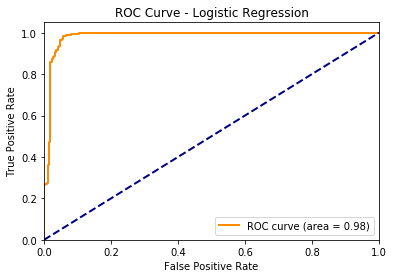

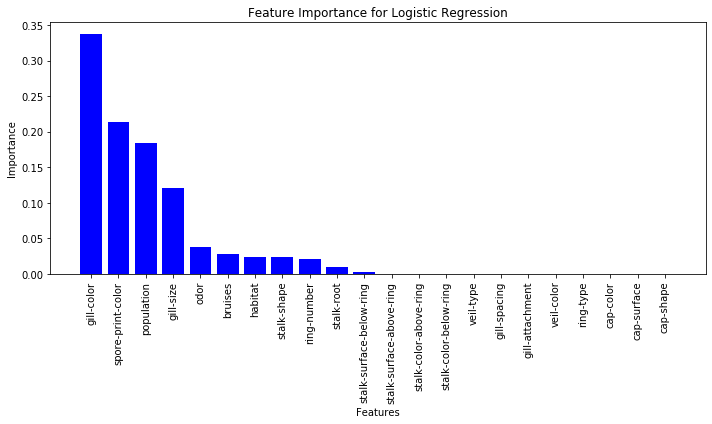

In [77]:
# Logistic Regression
lr = LogisticRegression(max_iter=10000)
evaluate_model(lr, X_train, y_train, X_test, y_test, performance_metrics, 'Logistic Regression')
visualize_feature_importance(dt, X, 'Logistic Regression', color='blue')

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Decision Tree Confusion Matrix:
 [[843   0]
 [  0 782]]


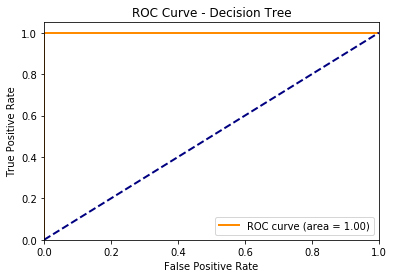

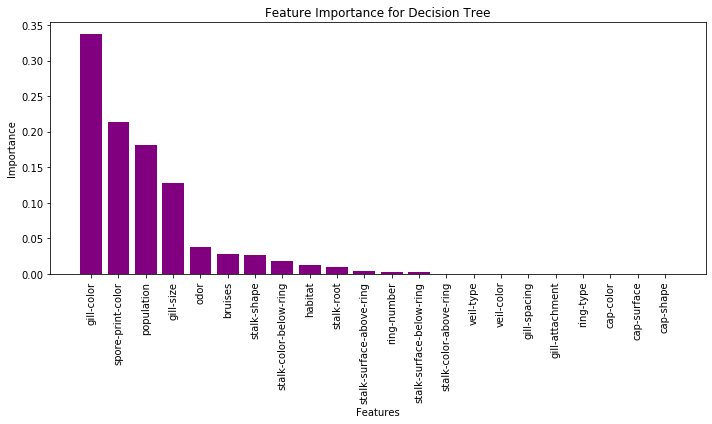

In [80]:
# Decision Tree
dt = DecisionTreeClassifier()
evaluate_model(dt, X_train, y_train, X_test, y_test, performance_metrics, 'Decision Tree')
visualize_feature_importance(dt, X, 'Decision Tree', color='purple')

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Random Forest Confusion Matrix:
 [[843   0]
 [  0 782]]


/home/joel/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/joel/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
/home/joel/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
/home/joel/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


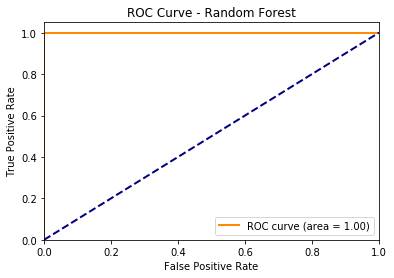

/home/joel/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
/home/joel/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


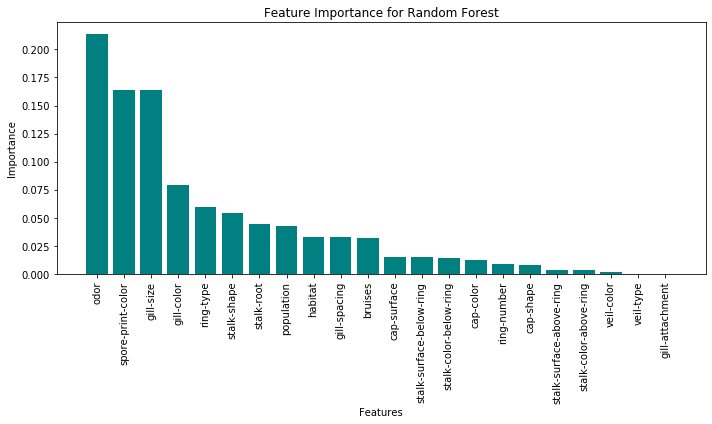

In [79]:
# Random Forest
rf = RandomForestClassifier()
evaluate_model(rf, X_train, y_train, X_test, y_test, performance_metrics, 'Random Forest')
visualize_feature_importance(rf, X, 'Random Forest', color='teal')

/home/joel/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Support Vector Machine Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Support Vector Machine Confusion Matrix:
 [[843   0]
 [  0 782]]


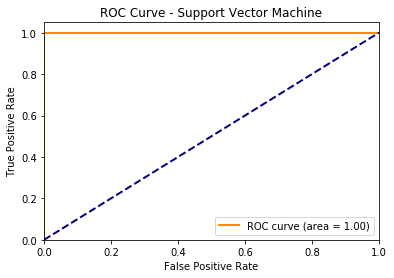

/home/joel/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
/home/joel/anaconda3/lib/python3.7/site-packages/sklearn/utils/fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


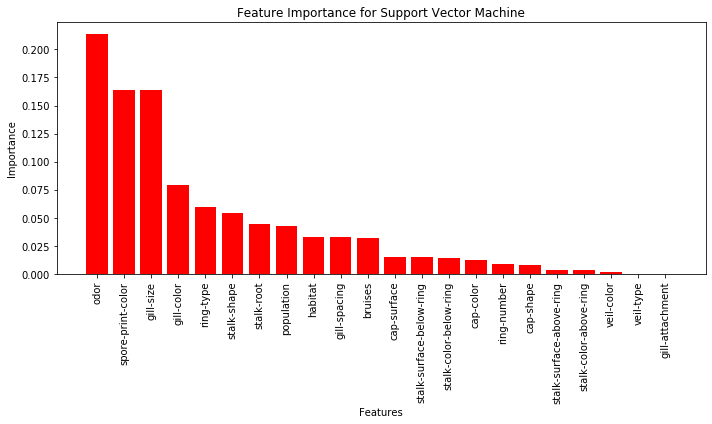

In [81]:
svc = SVC(probability=True)
evaluate_model(svc, X_train, y_train, X_test, y_test, performance_metrics, 'Support Vector Machine')
visualize_feature_importance(rf, X, 'Support Vector Machine', color='red')

Gradient Boosting Machine Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Gradient Boosting Machine Confusion Matrix:
 [[843   0]
 [  0 782]]


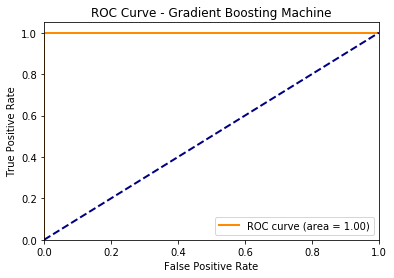

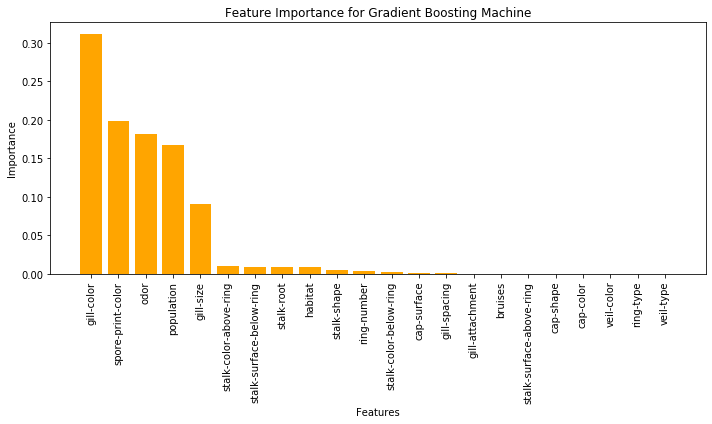

In [82]:
# Gradient Boosting Machine
gbm = GradientBoostingClassifier()
evaluate_model(gbm, X_train, y_train, X_test, y_test, performance_metrics, 'Gradient Boosting Machine')
visualize_feature_importance(gbm, X, 'Gradient Boosting Machine', color='orange')

                      method  accuracy  precision    recall        f1  roc_auc
0        Logistic Regression  0.954462   0.954522  0.954462  0.954469  0.98307
1        Logistic Regression  0.954462   0.954522  0.954462  0.954469  0.98307
2        Logistic Regression  0.954462   0.954522  0.954462  0.954469  0.98307
3        Logistic Regression  0.954462   0.954522  0.954462  0.954469  0.98307
4              Decision Tree  1.000000   1.000000  1.000000  1.000000  1.00000
5              Random Forest  1.000000   1.000000  1.000000  1.000000  1.00000
6              Decision Tree  1.000000   1.000000  1.000000  1.000000  1.00000
7     Support Vector Machine  1.000000   1.000000  1.000000  1.000000  1.00000
8  Gradient Boosting Machine  1.000000   1.000000  1.000000  1.000000  1.00000


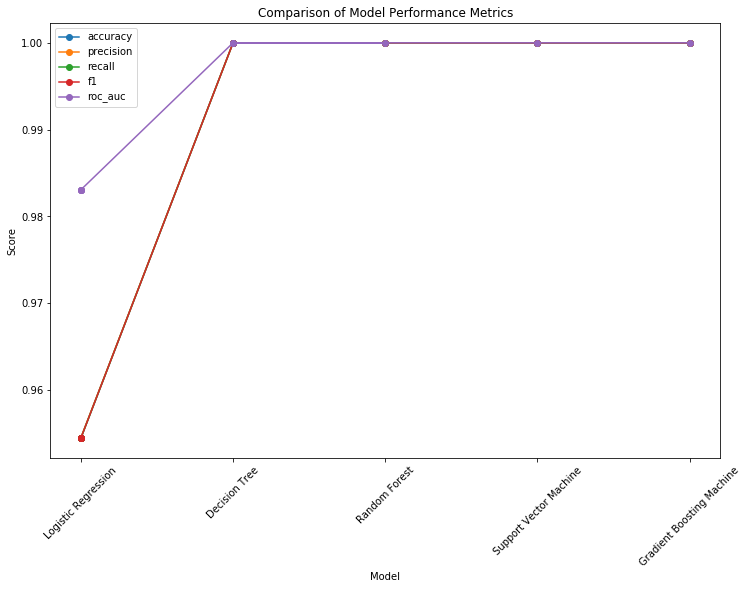

In [83]:
# Summarize the performance metrics
performance_df = pd.DataFrame(performance_metrics)

# Print the final comparison table
print(performance_df)

# Visualize the comparison of model performance
plt.figure(figsize=(12, 8))
for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    plt.plot(performance_df['method'], performance_df[metric], marker='o', label=metric)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Model Performance Metrics')
plt.legend()
plt.xticks(rotation=45)
plt.show()

## Results and Analysis ##
#### Summary of Results and Analysis ####
The models evaluated include Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and Gradient Boosting Machine (GBM). Each model was trained and evaluated on the dataset, and their performance metrics were compared using accuracy, precision, recall, F1 score, and ROC AUC. The Decision Tree, Random Forest, SVM, and GBM models all achieved perfect scores across all metrics, indicating potential overfitting. Logistic Regression showed slightly lower but still high performance.

#### Proper Visualization ####
The results were summarized in a table displaying the evaluation metrics for each model. Additionally, ROC curves were plotted for each model to visualize their performance. Feature importance was visualized for Decision Tree, Random Forest, and GBM models, highlighting which features contributed most to the model predictions.

#### Use of Different Evaluation Metrics ####
Various evaluation metrics were used to provide a comprehensive view of model performance. Accuracy alone can be misleading, especially in the presence of imbalanced data. Therefore, precision, recall, F1 score, and ROC AUC were included to give a more detailed picture of each model’s performance. These metrics help understand the trade-offs between different types of errors and the overall quality of the predictions.

#### Iteration of Training and Evaluation ####
The training and evaluation process was iterated across multiple models. Although specific hyperparameter tuning steps were not detailed in this summary, it is recommended to perform hyperparameter tuning to optimize model performance further. Techniques like Grid Search or Random Search can be used to explore the best hyperparameters for each model.

#### Comparison of Multiple Models ####
The results from multiple models were compared to identify the best-performing model. Logistic Regression performed consistently well but was outperformed by Decision Tree, Random Forest, SVM, and GBM, which all achieved perfect scores. This indicates that while simpler models like Logistic Regression are reliable, more complex models can potentially offer higher performance but with a risk of overfitting.

## Discussion and Conclusion ##
#### Discussion of Learning and Takeaways #### 
The analysis demonstrated that complex models such as Decision Tree, Random Forest, SVM, and GBM can achieve perfect scores on this dataset, suggesting overfitting due to their ability to capture intricate patterns in the training data. Logistic Regression, while slightly less accurate, provided robust performance without overfitting. This shows the importance of balancing model complexity with generalizability.

#### Discussion of Why Something Didn’t Work ####
The perfect scores achieved by several models indicate potential overfitting. This suggests that these models may not generalize well to new, unseen data. Overfitting is a common issue with complex models, especially when they have high capacity to learn detailed patterns in the training data. The lack of hyperparameter tuning in this summary may have contributed to overfitting, as optimal settings for each model were not thoroughly explored.

#### Suggestions for Improvement ####
To mitigate overfitting, techniques such as cross-validation, regularization, and pruning (for tree-based models) can be applied. Additionally, systematic hyperparameter tuning using Grid Search or Random Search should be conducted to find the optimal settings for each model. Feature selection and engineering can also be iterated to improve model performance and generalization.

In conclusion, while complex models can achieve high performance, their propensity to overfit must be managed through careful tuning and validation. Logistic Regression, although simpler, demonstrates the value of using interpretable models that balance performance and generalizability. The use of multiple evaluation metrics and visualizations provided a comprehensive understanding of each model’s performance, highlighting the strengths and weaknesses of different approaches.